# Analisi dei dati: esercizi


## 1. Introduzione


Python mette a disposizione degli strumenti potenti per l'analisi dei dati:

![](pydata.png)

Uno di questi è [Pandas](https://pandas.pydata.org/), che fornisce strutture di dati veloci e flessibili, soprattutto per l'analisi dei dati in tempo reale.

Installiamolo subito:

Anaconda:

- `conda install pandas`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user pandas ```


## 2. Analisi dei dati di Astro Pi


Proviamo ad analizzare i dati registrati dal Raspberry presente sulla Stazione Spaziale Internazionale, scaricati da qui:

[raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet](https://www.raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet/)

su cui è possibile trovare la descrizione dettagliata dei dati raccolti dai sensori, nel mese di febbraio 2016 (un record ogni 10 secondi).

**DOMANDA**: Che licenza hanno i dati ? Riesci a trovarla da qualche parte ?   

![](International_Space_Station_exploded_diagram_large.jpg)

Il metodo ```read_csv``` importa i dati da un file CSV e li memorizza in una struttura DataFrame.

In questo esercizio useremo il file [Columbus_Ed_astro_pi_datalog.csv](Columbus_Ed_astro_pi_datalog.csv)

In [1]:
import pandas as pd   # importiamo pandas e per comodità lo rinominiamo in  'pd'
import numpy as np    # importiamo numpy e per comodità lo rinominiamo in 'np'

# ricordatevi l'encoding !
df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110869 entries, 0 to 110868
Data columns (total 20 columns):
ROW_ID        110869 non-null int64
temp_cpu      110869 non-null float64
temp_h        110869 non-null float64
temp_p        110869 non-null float64
humidity      110869 non-null float64
pressure      110869 non-null float64
pitch         110869 non-null float64
roll          110869 non-null float64
yaw           110869 non-null float64
mag_x         110869 non-null float64
mag_y         110869 non-null float64
mag_z         110869 non-null float64
accel_x       110869 non-null float64
accel_y       110869 non-null float64
accel_z       110869 non-null float64
gyro_x        110869 non-null float64
gyro_y        110869 non-null float64
gyro_z        110869 non-null float64
reset         110869 non-null int64
time_stamp    110869 non-null object
dtypes: float64(17), int64(2), object(1)
memory usage: 17.8+ MB


Possiamo vedere rapidamente righe e colonne del dataframe con l'attributo `shape`:

**NOTA**: `shape` non è seguito da parentesi tonde !

In [2]:
df.shape

(110869, 20)

Il metodo `describe` vi da al volo tutta una serie di dati di riepilogo:

* il conteggio delle righe
* la media
* [la deviazione standard](https://it.wikipedia.org/wiki/Scarto_quadratico_medio)
* [i quartili](https://it.wikipedia.org/wiki/Quantile)
* minimo e massimo

In [3]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**DOMANDA**: Manca qualche campo alla tabella prodotta da describe? Perchè non l'ha incluso ? 

Per limitare `describe` ad una sola colonna come `humidity`, puoi scrivere così:

In [4]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

Ancora più comodamente, puoi usare la notazione con il punto:

In [5]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

**ATTENZIONE**: Nel caso il nome del campo avesse degli spazi (es. `'rotazioni frullatore'`), **non** potreste usare la notazione con il punto ma sareste costretti ad usare la notazione con le quadre vista sopra  (es: `df.['rotazioni frullatore'].describe()`)

Il metodo `head` restituisce i primi dataset:

In [6]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


Il metodo `tail` restituisce gli ultimi dataset:

In [7]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


La proprietà `colums` restituisce le intestazioni di colonna:

In [8]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

**Nota**: Come si vede qua sopra, il tipo dell'oggetto ritornato non è una lista, ma un contenitore speciale definito da pandas:

In [9]:
type(df.columns)

pandas.core.index.Index

Ciononostante, possiamo accedere agli elementi di questo contenitore usando indici dentro le parentesi quadre:

In [10]:
df.columns[0]

'ROW_ID'

In [11]:
df.columns[1]

'temp_cpu'

**2.1 DA FARE**: Creare un nuovo dataframe chiamato ```meteo``` importando i dati dal file meteo.csv, che contiene i dati meteo di Trento di novembre 2017 (fonte: https://www.meteotrentino.it). **IMPORTANTE**: assegna il dataframe ad una variabile chiamata `meteo` (così evitiamo confusione con il dataframe dell'AstroPi)

**2.2 DA FARE**: Visualizzare le informazioni relative a questo Dataframe.

In [12]:
# Crea qua il dataframe



## 3. Indicizzazione, filtraggio e ordinamento


Per ottenere la i-esima serie si utilizza il metodo `iloc[i]` (qui riusiamo il dataset dell'AstroPI) :

In [13]:
df.iloc[6]

ROW_ID                          7
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                    -50.4473
mag_y                    -7.93731
mag_z                    -12.1886
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
time_stamp    2016-02-16 10:45:41
Name: 6, dtype: object

&Egrave; possibile selezionare un dataframe di posizioni contigue, utilizzando lo _slicing_ (vedere [libro Pensare in Python](https://davidleoni.github.io/ThinkPythonItalian/html/thinkpython2009.html#sec98)).

Qua per esempio selezioniamo le righe dalla 5 _inclusa_ alla 7 _esclusa_ :

In [14]:
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


&Egrave; possibile filtrare i dati in base al soddisfacimento di una condizione.

Possiamo scoprire che tipo di dato &egrave; ad esempio ```df.ROW_ID >= 6```:

In [15]:
type(df.ROW_ID >= 6)

pandas.core.series.Series

Cosa contiene questo oggetto `Series` ? Se proviamo a stamparlo vedremo che si tratta di una serie di valori Vero o Falso, a seconda se il valore di ROW_ID è maggiore o uguale a 6:

In [16]:
df.ROW_ID >= 6

0         False
1         False
2         False
3         False
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110839     True
110840     True
110841     True
110842     True
110843     True
110844     True
110845     True
110846     True
110847     True
110848     True
110849     True
110850     True
110851     True
110852     True
110853     True
110854     True
110855     True
110856     True
110857     True
110858     True
110859     True
110860     True
110861     True
110862     True
110863     True
110864     True
110865     True
110866     True
110867     True
110868     True
Name: ROW_ID, dtype: boo

In modo analogo `(df.ROW_ID >= 6) & (df.ROW_ID <= 10)` è una serie di valori Vero o Falso, se ROW_ID è contemporaneamente maggiore o uguale a 6 e minore e uguale a 10.

In [17]:
type((df.ROW_ID >= 6) & (df.ROW_ID <= 10))

pandas.core.series.Series

Se vogliamo le righe complete del dataframe che soddisfano la condizione, possiamo scrivere così: 

In [18]:
df[(df.ROW_ID >= 6) & (df.ROW_ID <= 10)]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,-7.762600,-12.284196,-0.000523,0.019473,0.014298,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,-7.262934,-11.981090,-0.000522,0.019385,0.014286,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,-6.875270,-11.672494,-0.000581,0.019390,0.014441,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10


Quindi se cerchiamo il record in cui la pressione è massima, utilizziamo la proprietà ```values``` della serie su cui calcoliamo il valore massimo:

In [19]:
df[(df.pressure == df.pressure.values.max())]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20


Il metodo `sort_values' ritorna un dataframe ordinato in base a una o più colonne:

In [20]:
df.sort_values('pressure',ascending=False).head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20
77601,77602,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0,2016-02-25 12:13:10
77603,77604,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0,2016-02-25 12:13:30
77604,77605,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0,2016-02-25 12:13:40
77608,77609,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0,2016-02-25 12:14:20


La properietà `loc` ci permette di filtrare righe secondo una proprietà e selezionare una colonna, che puoò essere anche nuova. In questo caso, Per le righe dove la temperatura cpu è eccessiva, scriviamo il valore `True` nei campi della colonna con intestazione `'Too hot'`:

In [21]:
df.loc[(df.temp_cpu > 31.68),'Too hot'] = True 

Vediamo la tabella risultante (scorri fino in fondo per vedere la nuova colonna). Notiamo come i valori delle righe che non abbiamo filtrato vengono rappresentati con  `NaN`, che letteralmente significa _not a number_ : 

In [22]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,True
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,True
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,True
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,NaN


Pandas è una libreria molto flessibile, e fornisce diversi modi per ottenere gli stessi obbiettivi. Per esempio, possiamo effettuare la stessa operazione di sopra con il comando `np.where` come qua sotto. Ad esempio, aggiungiamo una colonna che mi dice se la pressione è sopra o sotto la media.

In [23]:
pressione_media = df.pressure.values.mean()
df['check_p'] = np.where(df.pressure <= pressione_media, 'sotto', 'sopra')

**DA FARE 3.1**: Analizzare i dati del Dataframe ```meteo``` e trovare:

* i valori di pressione media, minima e massima
* la temperatura media
* le date delle giornate di pioggia


## 4. Introduzione a MatPlotLib

Utilizziamo [Matplotlib](http://matplotlib.org) per disegnare i dati.

`plot` è il comando che utilizziamo per disegnare e può avere un solo argomento (la serie di valori da mettere sul grafico 2D) o due argomenti (i due valori xy del grafico a dispersione).

`plt.title()` serve a impostare il titolo del grafico.:

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

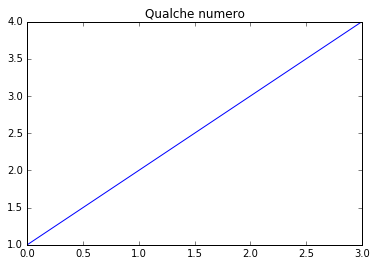

In [25]:
plt.plot([1,2,3,4])
plt.title('Qualche numero')
plt.show()

In [26]:
x = np.arange(0.,5.,0.1)
y = x**2


Utilizziamo la funzione `type` per capire che tipo di dati sono x e y:

In [27]:
type(x)

numpy.ndarray

In [28]:
type(y)

numpy.ndarray

Si tratta quindi di vettori di NumPy.

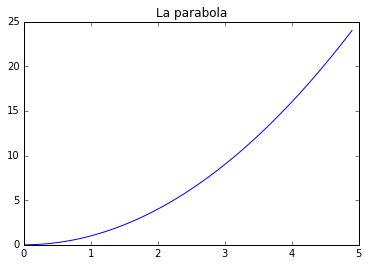

In [29]:
plt.title('La parabola')
plt.plot(x,y);

Se vogliamo che le unità dell'asse x siano della stessa dimensione di quelle dell'asse y, possiamo utilizzare la funzione [gca][gca]
[gca]: "https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca" "https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca"

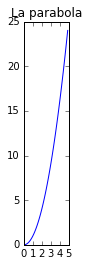

In [30]:
plt.xlim([0, 5])
plt.ylim([0,25])
plt.title('La parabola')

plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x,y);

In caso di un numero molto elevato di dati, può essere utile avere un'idea qualitativa dei dati, mettendoli in grafico.

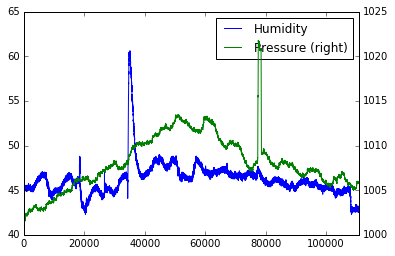

In [31]:
df.humidity.plot(label="Humidity", legend=True)
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

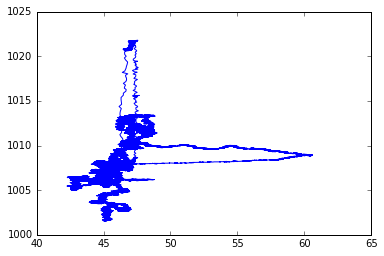

In [32]:
plt.plot(df['humidity'],df['pressure'])

In [33]:
df2=df.iloc[12500:15000]

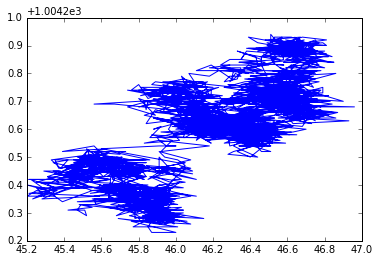

In [34]:
plt.plot(df2['humidity'],df2['pressure'])

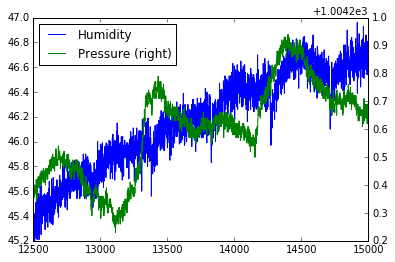

In [35]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)

Il metodo `corr` permette di calcolare la correlazione tra le colonne del DataFrame.

In [36]:
df2.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
ROW_ID,1.000000,0.561540,0.636899,0.730764,0.945210,0.760732,0.005633,0.266995,0.172192,-0.108713,0.057601,-0.270656,0.015936,0.121838,0.075160,-0.014346,-0.026012,0.011714,NaN
temp_cpu,0.561540,1.000000,0.591610,0.670043,0.488038,0.484902,0.025618,0.165540,0.056950,-0.019815,-0.028729,-0.193077,-0.021093,0.108878,0.065628,-0.019478,-0.007527,-0.006737,NaN
temp_h,0.636899,0.591610,1.000000,0.890775,0.539603,0.614536,0.022718,0.196767,-0.024700,-0.151336,0.031512,-0.260633,-0.009408,0.173037,0.129074,-0.005255,-0.017054,-0.016113,NaN
temp_p,0.730764,0.670043,0.890775,1.000000,0.620307,0.650015,0.019178,0.192621,0.007474,-0.060122,-0.039648,-0.285640,-0.034348,0.187457,0.144595,-0.010679,-0.016674,-0.017010,NaN
humidity,0.945210,0.488038,0.539603,0.620307,1.000000,0.750000,0.012247,0.231316,0.181905,-0.108781,0.131218,-0.191957,0.040452,0.069717,0.021627,0.005625,-0.001927,0.014431,NaN
pressure,0.760732,0.484902,0.614536,0.650015,0.750000,1.000000,0.037081,0.225112,0.070603,-0.246485,0.194611,-0.173808,0.085183,-0.032049,-0.068296,-0.014838,-0.008821,0.032056,NaN
pitch,0.005633,0.025618,0.022718,0.019178,0.012247,0.037081,1.000000,0.068880,0.030448,-0.008220,-0.002278,-0.019085,0.024460,-0.053634,-0.029345,0.040685,0.041674,-0.024081,NaN
roll,0.266995,0.165540,0.196767,0.192621,0.231316,0.225112,0.068880,1.000000,-0.053750,-0.281035,-0.479779,-0.665041,0.057330,-0.049233,-0.153524,0.139427,0.134319,-0.078113,NaN
yaw,0.172192,0.056950,-0.024700,0.007474,0.181905,0.070603,0.030448,-0.053750,1.000000,0.536693,0.300571,0.394324,-0.028267,0.078585,0.068321,-0.021071,-0.009650,0.064290,NaN
mag_x,-0.108713,-0.019815,-0.151336,-0.060122,-0.108781,-0.246485,-0.008220,-0.281035,0.536693,1.000000,0.046591,0.475674,-0.097520,0.168764,0.115423,-0.017739,-0.006722,0.008456,NaN


Nel grafico sottostante, disegnamo il variare nel tempo del valore assoluto del campo magnetico terrestre, rilevato dalla stazione spaziale.

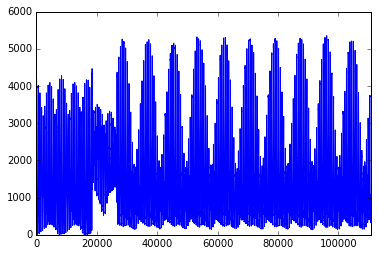

In [37]:
df['mag_tot']=df['mag_x']**2+df['mag_y']**2+df['mag_z']**2
df.mag_tot.plot()

In [38]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

Inserendo il valore trovato sul sito [isstracker.com/historical](http://www.isstracker.com/historical), possiamo rilevare le posizioni in cui il campo magnetico è più forte.

**DA FARE 4.1**: Mettere in grafico l'andamento delle temperature del dataframe _meteo_

**DA FARE 4.2**: Nello stesso grafico mostrare l'andamento della pressione e la quantità delle precipitazioni.

**DA FARE 4.3**: Calcolare la temperatura media giornaliera e mostrarla nel grafico.
